In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns


In [2]:
data = pd.read_csv("DATASETS/archive/train.csv")

In [3]:
data.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


In [5]:
data.columns

Index(['id', 'Gender', 'Age', 'Driving_License', 'Region_Code',
       'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium',
       'Policy_Sales_Channel', 'Vintage', 'Response'],
      dtype='object')

In [6]:
col_name = ['Gender' ,'Vehicle_Age', 'Vehicle_Damage','Previously_Insured']

C:\Users\Abhinav\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


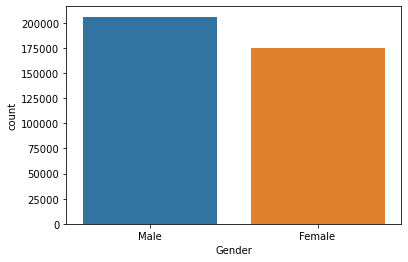

C:\Users\Abhinav\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


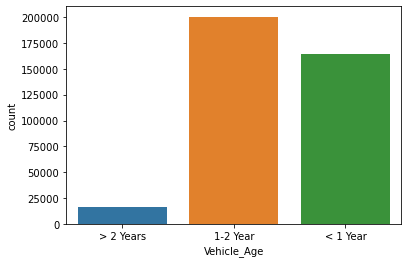

C:\Users\Abhinav\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


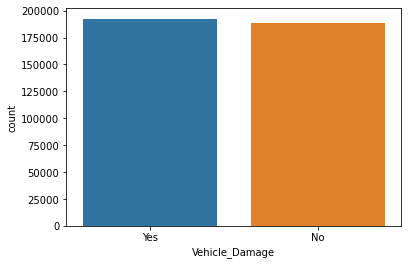

C:\Users\Abhinav\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


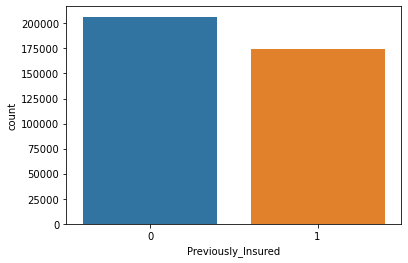

In [7]:
for name in col_name:
    sns.countplot(data[name])
    plt.show()

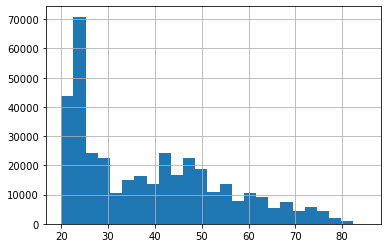

In [8]:
plt.hist(data['Age'],bins=25)
plt.grid()
plt.show()

In [9]:
col_name = ['Gender' ,'Vehicle_Age', 'Vehicle_Damage']

In [10]:
for name in col_name:
    data[name] = pd.factorize(data[name])[0]

In [11]:
data.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,0,44,1,28.0,0,0,0,40454.0,26.0,217,1
1,2,0,76,1,3.0,0,1,1,33536.0,26.0,183,0
2,3,0,47,1,28.0,0,0,0,38294.0,26.0,27,1
3,4,0,21,1,11.0,1,2,1,28619.0,152.0,203,0
4,5,1,29,1,41.0,1,2,1,27496.0,152.0,39,0


In [12]:
data.corr()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
id,1.000000,-0.000999,0.001561,-0.000564,-0.000572,0.002457,-0.000878,0.001507,0.003027,-0.002837,-0.000630,-0.001368
Gender,-0.000999,1.000000,-0.145545,0.018374,-0.000604,0.081932,0.160427,0.091606,-0.003673,0.111159,0.002517,-0.052440
Age,0.001561,-0.145545,1.000000,-0.079782,0.042574,-0.254682,-0.765790,-0.267534,0.067507,-0.577826,-0.001264,0.111147
Driving_License,-0.000564,0.018374,-0.079782,1.000000,-0.001081,0.014969,0.037306,0.016622,-0.011906,0.043731,-0.000848,0.010155
Region_Code,-0.000572,-0.000604,0.042574,-0.001081,1.000000,-0.024659,-0.043778,-0.028235,-0.010588,-0.042420,-0.002750,0.010570
Previously_Insured,0.002457,0.081932,-0.254682,0.014969,-0.024659,1.000000,0.380873,0.824143,0.004269,0.219381,0.002537,-0.341170
Vehicle_Age,-0.000878,0.160427,-0.765790,0.037306,-0.043778,0.380873,1.000000,0.396873,-0.041580,0.550663,0.001892,-0.221874
Vehicle_Damage,0.001507,0.091606,-0.267534,0.016622,-0.028235,0.824143,0.396873,1.000000,-0.009349,0.224377,0.002064,-0.354400
Annual_Premium,0.003027,-0.003673,0.067507,-0.011906,-0.010588,0.004269,-0.041580,-0.009349,1.000000,-0.113247,-0.000608,0.022575
Policy_Sales_Channel,-0.002837,0.111159,-0.577826,0.043731,-0.042420,0.219381,0.550663,0.224377,-0.113247,1.000000,0.000002,-0.139042


C:\Users\Abhinav\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


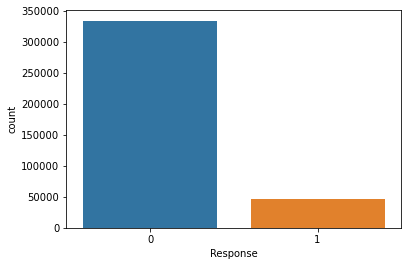

In [13]:
sns.countplot(data['Response'])
plt.show()

In [14]:
class_0_df = data[data['Response']==0]
class_1_df = data[data['Response']==1]

In [15]:
class_0_df.shape

(334399, 12)

In [16]:
class_1_df.shape

(46710, 12)

In [17]:
class_1_df_over = class_1_df.sample(334399,replace=True)

In [18]:
class_1_df_over.shape

(334399, 12)

In [19]:
balanced_df = pd.concat([class_0_df,class_1_df_over],axis=0)

C:\Users\Abhinav\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


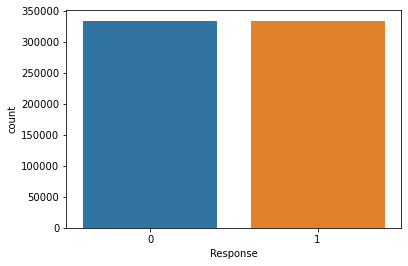

In [20]:
sns.countplot(balanced_df['Response'])
plt.show()

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler

In [22]:
balanced_df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
1,2,0,76,1,3.0,0,1,1,33536.0,26.0,183,0
3,4,0,21,1,11.0,1,2,1,28619.0,152.0,203,0
4,5,1,29,1,41.0,1,2,1,27496.0,152.0,39,0
5,6,1,24,1,33.0,0,2,0,2630.0,160.0,176,0
6,7,0,23,1,11.0,0,2,0,23367.0,152.0,249,0


In [23]:
X = balanced_df.iloc[:,1:-1]


In [24]:
X.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
1,0,76,1,3.0,0,1,1,33536.0,26.0,183
3,0,21,1,11.0,1,2,1,28619.0,152.0,203
4,1,29,1,41.0,1,2,1,27496.0,152.0,39
5,1,24,1,33.0,0,2,0,2630.0,160.0,176
6,0,23,1,11.0,0,2,0,23367.0,152.0,249


In [25]:
y = balanced_df['Response']

In [26]:
y.head()

1    0
3    0
4    0
5    0
6    0
Name: Response, dtype: int64

In [27]:
sc =StandardScaler()
X = sc.fit_transform(X)

In [28]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.20,random_state=1,stratify=y)

In [29]:
model = RandomForestClassifier()
model.fit(X_train,y_train)
pred = model.predict(X_test)

In [30]:
print("Classification Report \n")
print(classification_report(y_test,pred))

Classification Report 

              precision    recall  f1-score   support

           0       1.00      0.90      0.95     66880
           1       0.91      1.00      0.95     66880

    accuracy                           0.95    133760
   macro avg       0.95      0.95      0.95    133760
weighted avg       0.95      0.95      0.95    133760



In [31]:
print("Confusion Matrix\n")
print(confusion_matrix(y_test,pred))

Confusion Matrix

[[60177  6703]
 [  139 66741]]
